# Self Case Study-2_Severstal: Steel Defect Detection - Can you detect and classify defects in steel?

## Section-I

## 1. Business Problem

Steel is one of the most important building materials of modern times. Steel buildings are resistant to natural and man-made wear which has made the material popular around the world. The quality control of steel manufacturing is vital as it will affect the end-product quality. Identifying the defects present in the steel is a tedious repetition task for humans. Manual inspection of steel defects could lead to delay in the manufacturing process, and it is not an efficient way to warranty defect-free for steel manufacturing. Furthermore, if the undetected defects of steels are released to the end-users or customers, this could potentially lead to a bad reputation for the company.

To help make production of steel more efficient, this Kaggle competition will help identify defects.

‘Severstal’ is leading the charge in efficient steel mining and production. They believe the future of metallurgy requires development across the economic, ecological, and social aspects of the industry and they take corporate responsibility seriously. The company recently created the country’s largest industrial data lake, with petabytes of data that were previously discarded. Severstal is now looking to machine learning to improve automation, increase efficiency, and maintain high quality in their production. In this competition, we will be helping engineers improve the algorithm by localizing and classifying surface defects on a steel sheet.

## 2. Mapping the real-world problem to an ML problem

### 2.1 Description

In this competition we will be predicting the location and type of defects found in steel manufacturing. The images are named with a unique image ID. We have to segment and classify the defects in the test set.Each image may have no defects, a defect of a single class, or defects of multiple classes. For each image, we have to segment defects of each class (Class ID= [1,2,3,4]).

This is clearly a Multiclass problem. Given an image with some defect pixels, the task is to classify the defect pixels into their correct type and also to identify the non-defect pixels as well.Hence, the above problem can be posed as an image segmentation or Semantic segmentation task as the classification is at the pixel level.


### 2.2 Data Source

The data is available on kaggle.com and the same can be downloaded from the link:https://www.kaggle.com/competitions/severstal-steel-defect-detection/data

•	train_images/ - folder of training images

•	test_images/ - folder of test images (We will be segmenting and classifying these images)

•	train.csv - training annotations which provide segments for defects (Class ID= [1,2,3,4]).

•	sample_submission.csv - a sample submission file in the correct format.


## 3 Exploratory Data Analysis

### 3.1 Importing dependencies

In [1]:
#importing usefull library
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling as pp

### 3.2 Reading Data

### 3.2.1 Reading Data from train.csv

In [2]:
os.chdir('C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2')
os.getcwd()

'C:\\Users\\Vikrant Mohite\\Desktop\\Applied AI\\Case Study-2'

In [4]:
pd.options.display.max_columns=50
train_df = pd.read_csv("train.csv")
train_df.shape

(7095, 3)

In [5]:
train_df.head(5)

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   int64 
 2   EncodedPixels  7095 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.4+ KB


In [7]:
train_df.ImageId.value_counts()

ef24da2ba.jpg    3
db4867ee8.jpg    3
84865746c.jpg    2
5665ada1b.jpg    2
eb44ad79d.jpg    2
                ..
59ce36e8a.jpg    1
59c00ad1f.jpg    1
59bcf1693.jpg    1
59bc9997f.jpg    1
ffffd67df.jpg    1
Name: ImageId, Length: 6666, dtype: int64

In [8]:
train_df.nunique()

ImageId          6666
ClassId             4
EncodedPixels    7095
dtype: int64

In [9]:
train_df.ImageId.nunique()

6666

In [10]:
train_df.ClassId.value_counts()

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

### 3.2.2 Reading Data from the folder 'train_images' 

In [11]:
train_images = os.listdir("C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images")
len(train_images)

12568

In [12]:
train_images_df = pd.DataFrame(train_images,columns =['ImageId'])
train_images_df.head()

ImageId
0  0002cc93b.jpg
1  00031f466.jpg
2  000418bfc.jpg
3  000789191.jpg
4  0007a71bf.jpg

### 3.2.3 Mearging the data from train.csv of defective images with images in the folder train_images

In [13]:
train_df_mearged = pd.merge(train_df,train_images_df,how = 'outer',on = ['ImageId','ImageId'])
train_df_mearged.head(5)

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg      1.0  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg      3.0  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg      1.0  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg      4.0  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg      3.0  229501 11 229741 33 229981 55 230221 77 230468...

In [14]:
train_df_mearged.shape

(12997, 3)

In [15]:
train_df_mearged.tail()

ImageId  ClassId EncodedPixels
12992  ffa8210a1.jpg      NaN           NaN
12993  ffaa05016.jpg      NaN           NaN
12994  ffd0223a7.jpg      NaN           NaN
12995  ffe93442c.jpg      NaN           NaN
12996  fff0295e1.jpg      NaN           NaN

In [16]:
train_df_mearged.isnull().sum()

ImageId             0
ClassId          5902
EncodedPixels    5902
dtype: int64

In [23]:
7095+5902

12997

### 3.2.4 Visualization of mearged data with panda profiling library

In [17]:
pp.ProfileReport(train_df_mearged)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train_df_mearged.groupby(['ClassId']).size() 

ClassId
1.0     897
2.0     247
3.0    5150
4.0     801
dtype: int64

In [19]:
# replacing 'NaN' values if class ID of non-defective images with '0'
train_df_mearged['ClassId'].fillna(value=0,inplace=True)
train_df_mearged.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg      1.0  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg      3.0  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg      1.0  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg      4.0  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg      3.0  229501 11 229741 33 229981 55 230221 77 230468...

In [20]:
train_df_mearged.tail()

ImageId  ClassId EncodedPixels
12992  ffa8210a1.jpg      0.0           NaN
12993  ffaa05016.jpg      0.0           NaN
12994  ffd0223a7.jpg      0.0           NaN
12995  ffe93442c.jpg      0.0           NaN
12996  fff0295e1.jpg      0.0           NaN

### 3.2.5 Visualization of distribution of class IDs

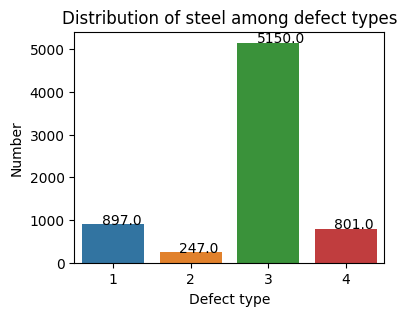

In [21]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x="ClassId", data=train_df)

plt.title('Distribution of steel among defect types')
plt.xlabel('Defect type')
plt.ylabel('Number')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

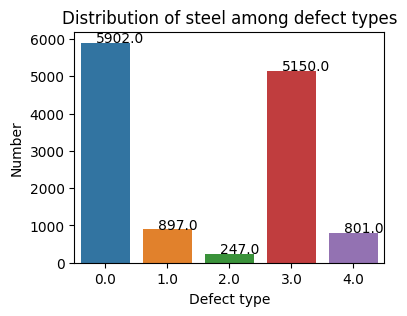

In [22]:
plt.figure(figsize=(4,3))
ax =sns.countplot(x="ClassId", data=train_df_mearged)

plt.title('Distribution of steel among defect types')
plt.xlabel('Defect type')
plt.ylabel('Number')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [37]:
train_df.groupby(['ImageId']).size().value_counts()

1    6239
2     425
3       2
dtype: int64

In [23]:
df = train_df.groupby(['ImageId']).size().value_counts()
iamagecount_df = pd.DataFrame(df)
iamagecount_df

0
1  6239
2   425
3     2

In [24]:
iamagecount_df['index'] = iamagecount_df.index
iamagecount_df.columns = ['count', 'no._of_defects']
iamagecount_df

count  no._of_defects
1   6239               1
2    425               2
3      2               3

### 3.3 Further analysis of images present in the dataset

In [25]:
# The below function creates the dataframe of path of the images
def return_file_names_df(root_dir):
    lst1 = []
    for path, dirc, files in os.walk(root_dir):
        for name in files:
            if name.endswith('jpg'):
                lst1.append(path + '/' + name)
    data_df = pd.DataFrame((lst1), columns = ["image_path"])
    pd.set_option('display.max_colwidth', None)
    pd.set_option("display.max_rows", None)
    return data_df

In [26]:
train_images_path = "C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images"
return_file_names_df(train_images_path)

image_path
0      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0002cc93b.jpg
1      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00031f466.jpg
2      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/000418bfc.jpg
3      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/000789191.jpg
4      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0007a71bf.jpg
5      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/000a4bcdd.jpg
6      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/000f6bf48.jpg
7      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0014fce06.jpg
8      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/001982b08.jpg
9      C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/001d1b355.jpg
10     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/001d3d093.jpg
11     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0025bde0c.jpg
12     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/002af848d.jpg
13     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/002e73b3c.jpg
14     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/002fc4e19.jpg
15     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0030401a5.jpg
16     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/003ac9d2a.jpg
17     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0046839bd.jpg
18     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005b92582.jpg
19     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005d86c25.jpg
20     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005da33cf.jpg
21     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005dbf0e0.jpg
22     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005f02e20.jpg
23     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/005f19695.jpg
24     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/006a4402e.jpg
25     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0074d81d0.jpg
26     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00762aa3b.jpg
27     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/007f28bba.jpg
28     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/008479d08.jpg
29     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/008621629.jpg
30     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0088260da.jpg
31     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00894274f.jpg
32     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/008b9acf5.jpg
33     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/008d0f87b.jpg
34     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/008ef3d74.jpg
35     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0095cd374.jpg
36     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/009b12ccc.jpg
37     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00ac8372f.jpg
38     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00af2671f.jpg
39     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00b989e78.jpg
40     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00bc01bfe.jpg
41     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00bf8497a.jpg
42     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00c24a74c.jpg
43     C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/00c6060db.jpg
44     C:/Users/Vikrant Mohit

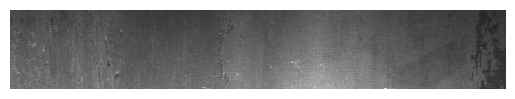

In [28]:
#reading a sample image
import cv2
img1 = cv2.imread('C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images/0002cc93b.jpg')
plt.imshow(img1)
plt.axis("off")
plt.show()

In [29]:
# printing shape of image
print("shape of image:", img1.shape)

shape of image: (256, 1600, 3)


Images that have defects:


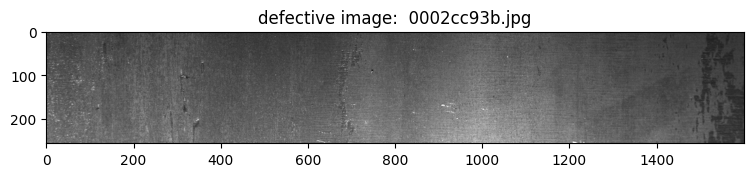

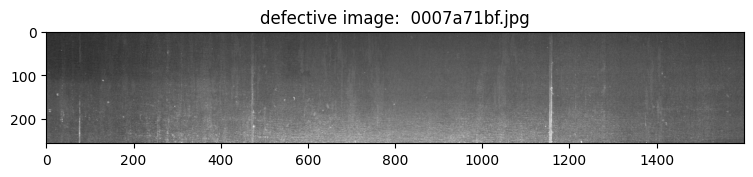

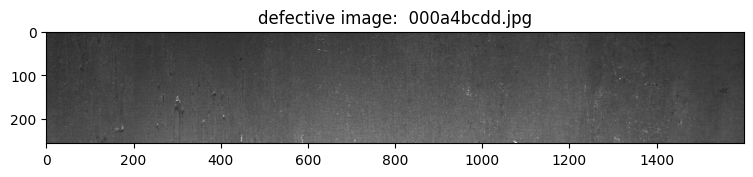

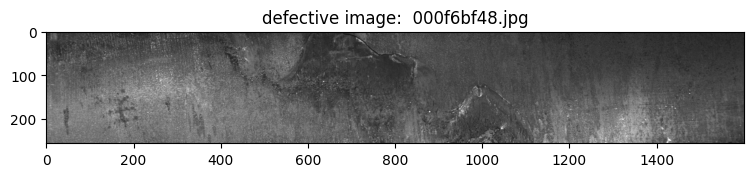

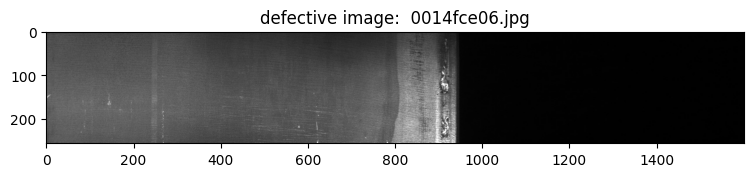

In [30]:
# code to print images that have defect
print("Images that have defects:")
for i, j in enumerate(train_df_mearged['ImageId'][train_df_mearged['ClassId']!=0]):
    if i < 5:
        plt.figure(figsize=(9, 3))
        img = cv2.imread(os.path.join(train_images_path , j))
        plt.imshow(img)
        plt.title("defective image:  "+j)
        plt.show()
    else:
        break

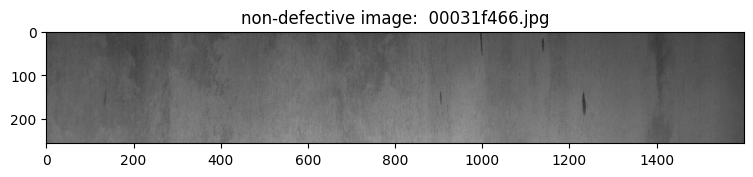

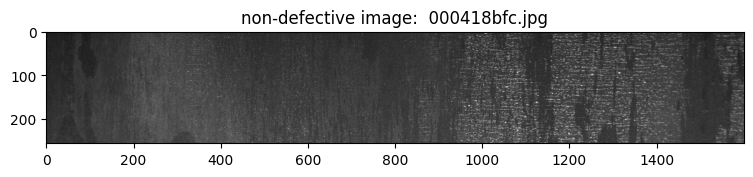

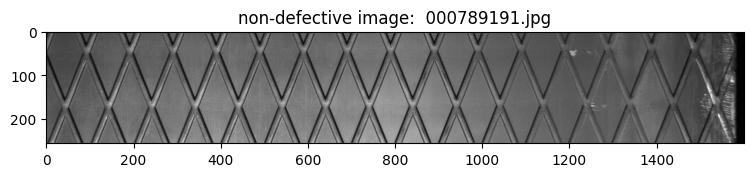

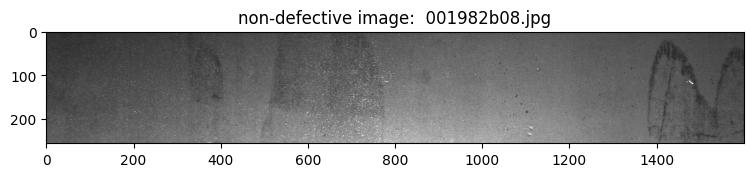

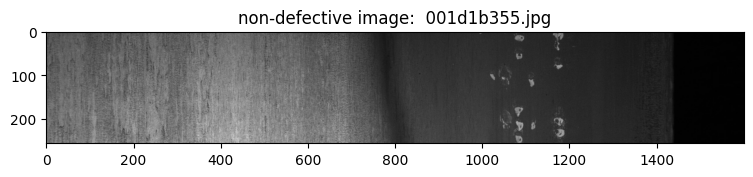

In [31]:
# code to print images that do not have any defect
for i, j in enumerate(train_df_mearged['ImageId'][train_df_mearged['ClassId']==0]):
    if i < 5:
        plt.figure(figsize=(9, 3))
        img = cv2.imread(os.path.join(train_images_path , j))
        plt.imshow(img)
        plt.title("non-defective image:  "+j)
        plt.show()
    else:
        break

### 3.4 Observation from the EDA and the analysis of images done above

The Dataset consists of a collection of grayscale steel surface images measuring 1600 x 256 pixels. There are total 12568 images in dataset of which 6666 have defects and 5902 do not have any defects. It is seen that the most of the defective images are having single defect. There are 425 images that have 2 defects each. There are only 2 images that have 3 defects each. It is also found that the class ID ‘3’ has most no. of samples followed by classes ‘1’, ‘4’ and ‘2’. The data is found to be highly imbalanced. 